# Data Preprocessing and Feature Engineering
You should build a machine learning pipeline with data preprocessing and feature engineering steps. In particular, you should do the following:
- Load the `adult` dataset using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html). You can find this dataset in the datasets folder.
- Split the dataset into training and test sets using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).
- Conduct data preprocessing and feature engineering by
    - handling the implicit missing values of attributes, e.g., removing them using [Pandas](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html);
    - transforming features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.compose.ColumnTransformer.html), which requires encoding categorical attributes using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) and scaling features using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html);
    - reducing the dimensionality of the dataset if needed using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html);
    - and handling imbalanced classes if needed using [Imbalanced-Learn](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html).
- Train and test a support vector machine model using [Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).
- Evaluate the impact of the data preprocessing and feature engineering techniques on the effectiveness and efficiency of the model.
- Check the documentation to identify the most important hyperparameters, attributes, and methods. Use them in practice.

##Importing Libraries

In [48]:
import pandas as pd
import sklearn.model_selection
import sklearn.compose
import sklearn.preprocessing
import sklearn.svm
import sklearn.metrics



##Business Problem Understanding (given)

##Data Collection

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/m-mahdavi/teaching/refs/heads/main/datasets/adult.csv") #loading the data
df.head() #shows first 5 rows

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [50]:
df_train,df_test = sklearn.model_selection.train_test_split(df)  #train_test_split function uses 25% for the test & 75% for the train
print("df size:",df.shape)
print("df_train size:",df_train.shape)
print("df_test size:",df_test.shape)

df size: (32561, 15)
df_train size: (24420, 15)
df_test size: (8141, 15)


##Data Exploration

In [9]:
df_train.dtypes #we explore the trained data because we have no access to the test data

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education-num,int64
marital-status,object
occupation,object
relationship,object
race,object
sex,object


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'fnlwgt'}>],
       [<Axes: title={'center': 'education-num'}>,
        <Axes: title={'center': 'capital-gain'}>],
       [<Axes: title={'center': 'capital-loss'}>,
        <Axes: title={'center': 'hours-per-week'}>]], dtype=object)

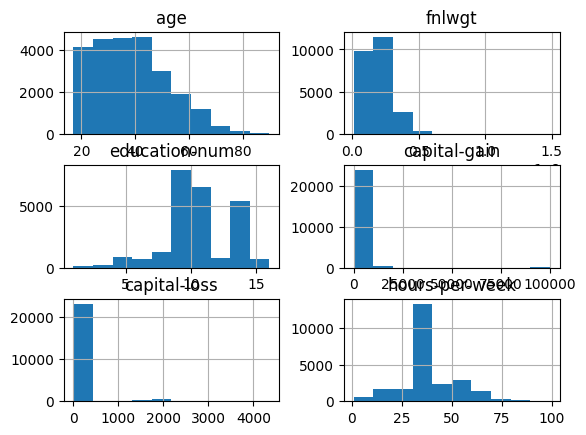

In [11]:
df_train.hist() #checked the distribution of data

<Axes: xlabel='workclass'>

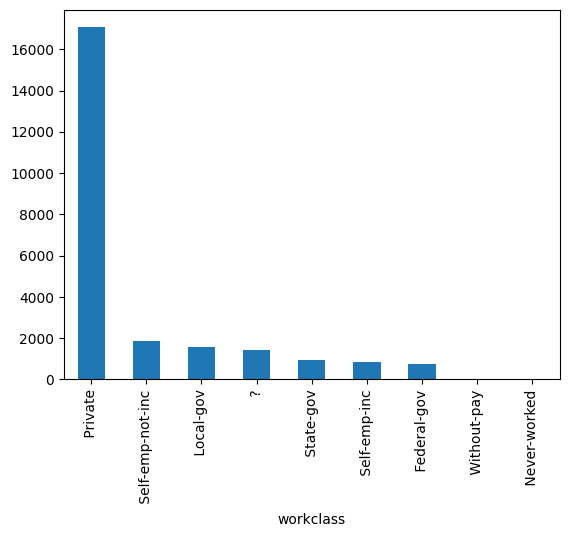

In [16]:
df_train["workclass"].value_counts().plot(kind='bar') #gives list of values and frequency
#here it consist a implicit missing value

In [24]:
df_train["workclass"].unique() #it shows that the data has the leading spaces in it

array([' Local-gov', ' Private', ' State-gov', ' Federal-gov',
       ' Self-emp-not-inc', ' Self-emp-inc', ' Without-pay'], dtype=object)

<Axes: xlabel='target'>

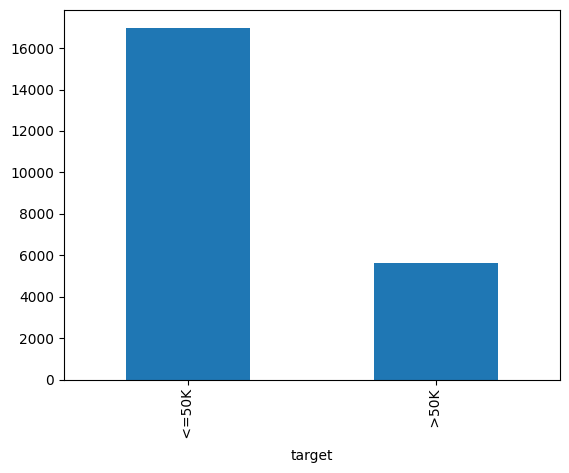

In [25]:
df_train["target"].value_counts().plot(kind='bar') #we check the target column whether they are balanced or imbalanced

##Data Preprocessing

In [23]:
df_train = df_train.replace(" ?", pd.NaT) #helps in replacing a value from the dataset & NaT represents the null value
df_test = df_test.replace(" ?", pd.NaT) #helps in replacing a value from the dataset & NaT represents the null value

df_train = df_train.dropna() #removes the explicit missing values
df_test= df_test.dropna()

print("df_train size:",df_train.shape)
print("df_test size:",df_test.shape)

df_train size: (22596, 15)
df_test size: (7566, 15)


In [28]:
x_train = df_train.drop("target",axis=1) #drop methods by default removes the row but here we want to remove the column "target" so that's why we have mentioned the axis value to 1 for dropping the column
y_train = df_train["target"] #we need to separate the features from the target labels
x_test = df_test.drop("target",axis=1)
y_test = df_test["target"]

print("x_train size:",x_train.shape)
print("y_train size:",y_train.shape)
print("x_test size:",x_test.shape)
print("y_test size:",y_test.shape)


x_train size: (22596, 14)
y_train size: (22596,)
x_test size: (7566, 14)
y_test size: (7566,)


##Feature Engineering

In [42]:
categorical_attributes = x_train.select_dtypes(include=['object']).columns #for fetching the list of categorical column (objective type columns)
numerical_attributes = x_train.select_dtypes(include=['int64']).columns #for fetching the list of numerical column (integer type columns)

ct = sklearn.compose.ColumnTransformer( #transforming the columns
    [
        ("scaling",sklearn.preprocessing.StandardScaler(),numerical_attributes), #scaling the numerical attributes
        ("encoding",sklearn.preprocessing.OneHotEncoder(handle_unknown='ignore'),categorical_attributes) #encoding of categorical input

    ]
)

ct.fit(x_train) #train our column transformer
x_train = ct.transform(x_train) #transforming the data - it applies the knowledge
x_test = ct.transform(x_test)

print("x_train size:",x_train.shape)
print("x_test size:",x_test.shape)

x_train size: (22596, 104)
x_test size: (7566, 104)


In [ ]:
#ADD PCA ALGORITHM AND DO THE DIMENSIONALITY REDUCTION IN THE ABOVE - It is not required but for practice we have to do this

##Model Training

In [45]:
#supervised learning task so we have to give both x and y train for the model training

model = sklearn.svm.SVC()
model.fit(x_train,y_train)

SVC()

## Model Evaluation

In [49]:
y_predicted = model.predict(x_test) #we only pass x_test and it predicts the targets
accuracy = sklearn.metrics.accuracy_score(y_test, y_predicted) #we compare the actual targets with the predicted target and check the accuracy
accuracy # the accuracy we get is 84% in between 0-1

0.8420565688606926